<a href="https://colab.research.google.com/github/imtoga/imtoga/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 0.8818 - val_loss: 0.5681
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5277 - val_loss: 0.4967
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4873 - val_loss: 0.4709
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4635 - val_loss: 0.4523
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4507 - val_loss: 0.4398
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4426 - val_loss: 0.4346
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4445 - val_loss: 0.4333
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4309 - val_loss: 0.4296
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4200 - val_loss: 0.4166
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4150 - val_loss: 0.4201

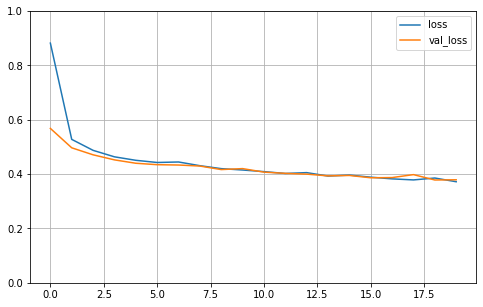

162/162 [==============================] - 0s 1ms/step - loss: 0.3677


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
x_train_full, x_test , y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train , x_valid , y_train , y_valid = train_test_split(x_train_full , y_train_full)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu" , input_shape = x_train.shape[1:]),
                                 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error" , optimizer="sgd")
history = model.fit(x_train, y_train , epochs=20 , validation_data = (x_valid,y_valid))

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
se_test = model.evaluate(x_test, y_test)